# DF CON VARIABLES DE 4 HORAS #

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,root_mean_squared_error


In [240]:
import requests
import pandas as pd
import time

def get_binance_ohlcv(symbol="BTCUSDT", interval="1h", days=1095):
    """
    Descarga velas OHLCV desde Binance.
    symbol: par de trading (ej: BTCUSDT)
    interval: intervalo de vela (ej: 1h, 1d, 15m)
    days: días de datos hacia atrás
    """
    base_url = "https://api.binance.com/api/v3/klines"
    
    # Binance limita 1000 velas por request → dividir en chunks
    limit = 1000
    ms_interval = 60 * 60 * 1000  # 1h en milisegundos
    if interval == "1d":
        ms_interval = 24 * 60 * 60 * 1000
    
    end_time = int(time.time() * 1000)  # ahora en ms
    start_time = end_time - days * 24 * 60 * 60 * 1000
    
    all_data = []
    
    while start_time < end_time:
        params = {
            "symbol": symbol,
            "interval": interval,
            "startTime": start_time,
            "limit": limit
        }
        resp = requests.get(base_url, params=params)
        data = resp.json()
        
        if not data:
            break
        
        all_data.extend(data)
        
        # avanzar el start_time al último timestamp + intervalo
        last_open_time = data[-1][0]
        start_time = last_open_time + ms_interval
        
        time.sleep(0.2)  # para no sobrecargar la API
    
    # convertir a DataFrame
    df = pd.DataFrame(all_data, columns=[
        "open_time", "open", "high", "low", "close", "volume",
        "close_time", "quote_asset_volume", "number_of_trades",
        "taker_buy_base", "taker_buy_quote", "ignore"
    ])
    
    # limpiar tipos de datos
    df["open_time"] = pd.to_datetime(df["open_time"], unit="ms")
    df["close_time"] = pd.to_datetime(df["close_time"], unit="ms")
    for col in ["open", "high", "low", "close", "volume"]:
        df[col] = df[col].astype(float)
    
    return df[["open_time", "open", "high", "low", "close", "volume"]]

# ======================
# 🚀 Descargar datos
# ======================
df = get_binance_ohlcv("BTCUSDT", "1h", days=1095)

# guardar en CSV
df.to_csv("BTCUSDT_1h_3years.csv", index=False)

print("✅ Datos descargados y guardados en BTCUSDT_1h_3years.csv")
print(df.head())
print(df.tail())


✅ Datos descargados y guardados en BTCUSDT_1h_3years.csv
            open_time      open      high       low     close       volume
0 2022-09-23 23:00:00  19332.39  19406.73  19231.05  19289.91  15942.11146
1 2022-09-24 00:00:00  19288.57  19316.14  19070.61  19146.12  15461.74283
2 2022-09-24 01:00:00  19146.90  19223.51  19075.03  19118.23  11466.69284
3 2022-09-24 02:00:00  19118.23  19195.54  19077.00  19126.91  10854.01531
4 2022-09-24 03:00:00  19127.44  19150.00  19029.80  19121.92   9981.79181
                open_time       open       high        low      close  \
26274 2025-09-22 18:00:00  112398.65  112816.55  112345.54  112429.13   
26275 2025-09-22 19:00:00  112429.12  112600.87  111936.40  112122.90   
26276 2025-09-22 20:00:00  112122.90  112977.41  111975.28  112781.88   
26277 2025-09-22 21:00:00  112781.87  112970.00  112602.79  112969.99   
26278 2025-09-22 22:00:00  112969.99  112970.00  112684.45  112749.80   

           volume  
26274   470.04903  
26275  1307.37

In [241]:
df=pd.read_csv("/home/rodrigo/Escritorio/Repositorios/Proyecto_cripto_RH/src/BTCUSDT_1h_3years.csv")

In [ ]:
#vamos a ver como funciona sin el volumen
df_porcentual=pd.DataFrame(columns=["4hora%","dia%","2dias%","1semana%"])
def porcentaje (df,columna_objetivo,n_de_intervalos,columna_nueva):

    for i in range(n_de_intervalos,len(df[columna_objetivo])):
        cambio=(df[columna_objetivo][i-n_de_intervalos]-df[columna_objetivo][i])/df[columna_objetivo][i-n_de_intervalos]
        df.loc[i,columna_nueva]=cambio*100

porcentaje(df,"close",1,"1hora%")
porcentaje(df,"close",4,"4hora%")
porcentaje(df,"close",8,"8hora%")
porcentaje(df,"close",24,"dia%")
porcentaje(df,"close",48,"2dias%")
porcentaje(df,"close",24*7,"1semana%")
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [243]:
df_porcentual=df

In [244]:
df_porcentual["pred_dia%"]=df_porcentual["dia%"].shift(-24)

In [245]:
df_porcentual.dropna(inplace=True)
df_porcentual.reset_index(drop=True,inplace=True)

In [246]:
df_porcentual

,open_time,open,high,low,close,volume,1hora%,4hora%,dia%,2dias%,1semana%,pred_dia%
0,2022-09-30 23:00:00,19384.86,19475.40,19358.67,19422.61,9858.75580,-0.194740,0.261432,0.862108,-0.050431,-0.687924,0.574897
1,2022-10-01 00:00:00,19422.61,19484.00,19351.02,19402.88,8651.64878,0.101583,0.110326,0.728920,0.180626,-1.341055,0.643770
2,2022-10-01 01:00:00,19401.84,19431.97,19365.84,19423.84,6312.08506,-0.108025,-0.324207,0.431923,0.372836,-1.598527,0.595866
3,2022-10-01 02:00:00,19423.06,19436.00,19384.41,19413.79,5773.83532,0.051741,-0.149240,-0.275199,0.124807,-1.499876,0.491558
4,2022-10-01 03:00:00,19413.96,19438.75,19361.05,19416.05,5861.49212,-0.011641,0.033775,-0.092432,0.468794,-1.538182,0.541923
...,...,...,...,...,...,...,...,...,...,...,...,...
26082,2025-09-21 18:00:00,115628.19,115665.52,115513.98,115530.90,173.87321,0.084132,-0.026745,0.156086,-0.106934,-0.123661,2.684797
26083,2025-09-21 19:00:00,115530.89,115530.90,115318.02,115480.05,132.68903,0.044014,0.044628,0.191829,-0.308299,0.133991,2.907126
26084,2025-09-21 20:00:00,115480.05,115503.47,115307.51,115307.51,93.55507,0.149411,0.007362,0.357402,0.030396,0.427151,2.190343
26085,2025-09-21 21:00:00,115307.52,115434.53,115250.01,115405.48,101.37440,-0.084964,0.192600,0.328908,0.051886,0.562990,2.110376


In [297]:
relativ_error=[]
aciertos_direccion_list=[]
error_aciertos_list=[]
y_pred_guardadas=[]
y_real_guardadas=[]
restricciones=["open_time","pred_dia%"]
medir="pred_dia%"
for i in range(86):
    print(i)
    #vamos a separar los datos de entreno y los outsider
    entreno=df_porcentual[10000+i:26000+i]
    outsider=df_porcentual[26000+i+1:26000+i+2]
    #print(outsider)
    outsider.reset_index(drop=True,inplace=True)
    entreno.reset_index(drop=True,inplace=True)
    #ahora ponemos el y el x
    X_entreno=entreno.drop(restricciones,axis=1)
    y=entreno[medir]
    X_train, X_test, y_train, y_test = train_test_split(X_entreno, y, test_size=0.001, random_state=42)
    model=RandomForestRegressor( n_estimators=60, random_state=42)
    model.fit(X_train,y_train)
    X_outsider=outsider.drop(restricciones,axis=1)
    y_outsider=outsider[medir]#es el real
    predicciones_outsider=model.predict(X_outsider)
    #print(y_outsider[0])
    y_pred_guardadas.append(predicciones_outsider[0])
    y_real_guardadas.append(y_outsider[0])
    error_relativo_porcentual=abs(y_outsider[0]-predicciones_outsider)/y_outsider[0]
    relativ_error.append(error_relativo_porcentual)
    if y_outsider[0]*predicciones_outsider>0:
        aciertos_direccion_list.append(predicciones_outsider)
        error_relativo_aciertos=abs(y_outsider[0]-predicciones_outsider)/y_outsider[0]
        error_aciertos_list.append(error_relativo_aciertos)

error_total=abs(np.array(relativ_error).sum())/len(relativ_error)
aciertos_direccion=len(aciertos_direccion_list)
error_aciertos=abs(np.array(error_aciertos_list).sum())/len(error_aciertos_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85


In [299]:
tabla_resultados=pd.DataFrame(columns=["error_total","error_aciertos","aciertos_direccion"])
tabla_resultados["error_total"]=error_total
tabla_resultados["error_aciertos"]=error_aciertos
tabla_resultados["aciertos_direccion"]=aciertos_direccion
print(f'error_aciertos: {error_aciertos}')
print(f'n_aciertos: {aciertos_direccion/len(relativ_error)}')
print(f'error total: {error_total}')

error_aciertos: 0.07375516934230388
n_aciertos: 0.5813953488372093
error total: 0.42515061530040077


mejor de momento 15k muestras-60 arboles
error_aciertos: 0.8455168662221639
n_aciertos: 0.77
error total: 1.9687349553493934

<Axes: xlabel='None', ylabel='real'>

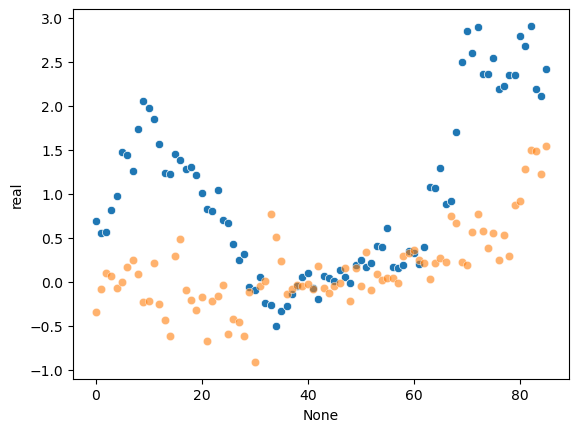

In [300]:
guardados=pd.DataFrame(columns=["real","predicciones","dif"])
guardados["real"]=y_real_guardadas
guardados["predicciones"]=y_pred_guardadas
sns.scatterplot(guardados,x=guardados.index,y=guardados["real"])
sns.scatterplot(guardados,x=guardados.index,y="predicciones",alpha=0.6)

In [292]:
guardados

,real,predicciones,dif
0,0.691235,-0.597508,NaN
1,0.561300,-0.138046,NaN
2,0.571212,0.093375,NaN
3,0.821552,0.048046,NaN
4,0.977076,-0.019081,NaN
...,...,...,...
81,2.684797,1.220382,NaN
82,2.907126,1.446334,NaN
83,2.190343,1.320535,NaN
84,2.110376,1.378213,NaN


In [302]:
#hay que traducir a precio
#predio anterior-precio nuevo/precio anterior
#%*precioanterior--precioanterior
rev=df_porcentual["close"].tail(len(guardados["predicciones"]))
rev.dropna(inplace=True)
rev.reset_index(drop=True,inplace=True)
for i in range(len(guardados["predicciones"])):
    precio=guardados["predicciones"][i]*rev[i]-rev[i]
    print(precio)

-156742.14301281678
-126089.70700206904
-105671.50669183876
-109188.6472691459
-125778.07484657006
-117762.27179865069
-98050.64761701721
-87674.57118433234
-107093.3034178846
-145046.43485185126
-142925.34835413023
-92399.23153081516
-146463.8077193313
-167870.56362543386
-188433.00478378285
-82912.81535441731
-59790.45276168752
-127372.73622114924
-140359.12674148282
-154113.4986821902
-136956.61153647874
-195283.2100099601
-141698.59923198653
-135283.08636207232
-120418.1580935056
-185988.76511944388
-164758.771903566
-168656.09147872328
-188128.66362845292
-129211.78868700056
-221056.83462296642
-121944.37713809585
-114896.36230902566
-26702.358269462813
-56594.57523782495
-88046.99376103104
-131384.5479931651
-124656.33724314466
-119150.53224702078
-121029.64083677763
-117900.59708088165
-124527.70403160082
-94862.326331508
-122916.43107938161
-130066.04557169697
-120987.32560577942
-116985.09245872042
-96677.69680649658
-140657.3789094517
-96876.20820271468
-121461.840923749
-770

# XGBoots #

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [275]:

relativ_error=[]
aciertos_direccion_list=[]
error_aciertos_list=[]
y_pred_guardadas=[]
y_real_guardadas=[]
restricciones=["open_time","pred_dia%","1semana%","open"]
medir="pred_dia%"
for i in range(100):
    print(i)
    #vamos a separar los datos de entreno y los outsider
    entreno=df_porcentual[10000+i:25000+i]
    outsider=df_porcentual[25000+i+1:25000+i+2]
    #print(outsider)
    outsider.reset_index(drop=True,inplace=True)
    entreno.reset_index(drop=True,inplace=True)
    #ahora ponemos el y el x
    X_entreno=entreno.drop(restricciones,axis=1)
    y=entreno[medir]
    X_train, X_test, y_train, y_test = train_test_split(X_entreno, y, test_size=0.001, random_state=42)
    model=XGBRegressor(random_state=42,colsample_bytree=1.0, gamma= 0.5, learning_rate= 0.04 ,min_child_weight= 5, n_estimators= 500, reg_alpha= 0.01, reg_lambda= 0.5, subsample= 0.8)
    model.fit(X_train,y_train)
    X_outsider=outsider.drop(restricciones,axis=1)
    y_outsider=outsider[medir]#es el real
    predicciones_outsider=model.predict(X_outsider)
    #print(y_outsider[0])
    y_pred_guardadas.append(predicciones_outsider[0])
    y_real_guardadas.append(y_outsider[0])
    error_relativo_porcentual=abs(y_outsider[0]-predicciones_outsider)/y_outsider[0]
    relativ_error.append(error_relativo_porcentual)
    if y_outsider[0]*predicciones_outsider>0:
        aciertos_direccion_list.append(predicciones_outsider)
        error_relativo_aciertos=abs(y_outsider[0]-predicciones_outsider)/y_outsider[0]
        error_aciertos_list.append(error_relativo_aciertos)

error_total=abs(np.array(relativ_error).sum())/len(relativ_error)
aciertos_direccion=len(aciertos_direccion_list)
error_aciertos=abs(np.array(error_aciertos_list).sum())/len(error_aciertos_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [276]:
tabla_resultados=pd.DataFrame(columns=["error_total","error_aciertos","aciertos_direccion"])
tabla_resultados["error_total"]=error_total
tabla_resultados["error_aciertos"]=error_aciertos
tabla_resultados["aciertos_direccion"]=aciertos_direccion
print(f'error_aciertos: {error_aciertos}')
print(f'n_aciertos: {aciertos_direccion/len(relativ_error)}')
print(f'error total: {error_total}')


error_aciertos: 0.7988849843131546
n_aciertos: 0.71
error total: 2.316451128140331


<Axes: xlabel='None', ylabel='real'>

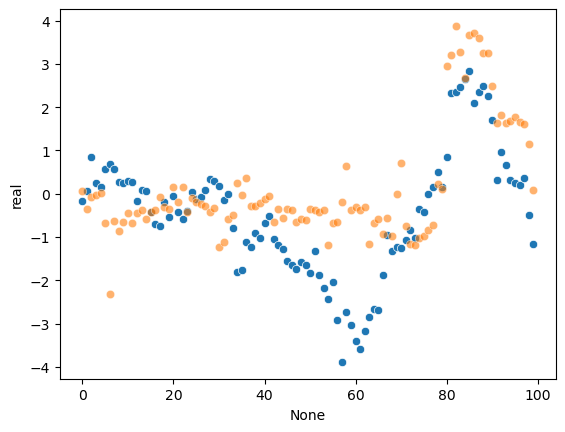

In [277]:
guardados=pd.DataFrame(columns=["real","predicciones","dif"])
guardados["real"]=y_real_guardadas
guardados["predicciones"]=y_pred_guardadas
sns.scatterplot(guardados,x=guardados.index,y=guardados["real"])
sns.scatterplot(guardados,x=guardados.index,y="predicciones",alpha=0.6)